# Project Bluecoats - Score Analysis And Visualization

# Read Me 
**📌 Purpose**  
This notebook visualizes the performance progression of the Bluecoats Drum Corps across selected seasons, using caption-level DCI scoring data.  
The report aims to identify scoring patterns, highlight major performance shifts, and compare caption scores (**General Effect**, **Visual**, and **Music**) across the seasons.
**📊 Data Source**  
- "https://www.dci.org/scores/"
- Contains show-level scoring data for the Bluecoats, including overall scores and individual captions.

**Collection & Cleaning DCI.org**
- [Initial Parsing](#initial-parsing)
- [Updating Latest Show Data](#updating-las)
- [Dataframes Displays](#dataframes) 

**Visualization**
- [Preparation](#preparation)
- [Total Score Graph](#total-score-g)
- [Caption Score Graphs](#caption-scor)

**Future Outlook...**

Enjoy!

**Author**  
**Xi Cong**  
**July 2025**


In [2]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import importlib 
import sys 
sys.path.append("scripts")

DATA_DIR = "data"


# Colletion and Cleaning DCI.org

## Inital Parsing
Loops through all the shows documented on dci.org and writes the caption and sub caption scores into a csv file notated by date, location, corp name into a score_by_show&corp.csv

In [51]:
# import find_show_info as fds
# importlib.reload(fds)
# fds.scrape_dci_recaps_selenium()
# fds.build_show_score_list()
# fds.build_show_score_df()

## Updating Lastest Shows
Updates the lastest shows and write it to score_by_show.csv (name slightly different for differentiating purpose).

In [ ]:
import find_show_info as fds
importlib.reload(fds)
fds.build_lastest_show_score_df()

## Dataframes

Raw html

In [ ]:
df_raw = pd.read_csv(f"{DATA_DIR}/all_shows_score_recap.csv")
pprint(df_raw.iloc[0, 0:3])

July 25, 2025                                                                                                                              July 25, 2025
Nashville, TN                                                                                                                             Birmingham, AL
General Effect|General Effect 1|T. Wemhoff|Rep|Perf|TOT|General Effect 2|M. Howard|Rep|Perf|TOT|TOT    General Effect|General Effect 1|A. Combites|Re...
Name: 0, dtype: object


All corps score at all shows

In [5]:
df_all = pd.read_csv(f"{DATA_DIR}/score_by_show.csv")
display(df_all.iloc[:2,:])

,Show Date,Show Location,Corp Name,General Effect - TOT,General Effect - TOT_rank,Visual - TOT,Visual - TOT_rank,Music - TOT,Music - TOT_rank,Sub Total,Sub Total_rank,Total,Total_rank
0,"July 27, 2025","Winston-Salem, NC",Bluecoats,38.1,1,28.25,1,28.2,1,94.550,1,94.550,1
1,"July 27, 2025","Winston-Salem, NC",Blue Devils,36.8,2,27.80,2,27.8,2,92.400,2,92.400,2


All Bluecoats shows since 2013

In [6]:
import find_show_info as fds
importlib.reload(fds)
fds.find_bluecoats()
df_bloo = pd.read_csv(f"{DATA_DIR}/bluecoats_shows.csv")
display(df_bloo.iloc[:2,:])

,Unnamed: 0,Show Date,Show Location,Corp Name,General Effect - TOT,General Effect - TOT_rank,Visual - TOT,Visual - TOT_rank,Music - TOT,Music - TOT_rank,Sub Total,Sub Total_rank,Total,Total_rank
0,0,"July 27, 2025","Winston-Salem, NC",Bluecoats,38.10,1,28.25,1,28.200,1,94.550,1,94.550,1
1,20,"July 26, 2025","Atlanta, GA",Bluecoats,38.25,1,28.40,1,28.375,1,95.025,1,95.025,1


# Visualization

## Preparation

Bluecoats color from media pictures

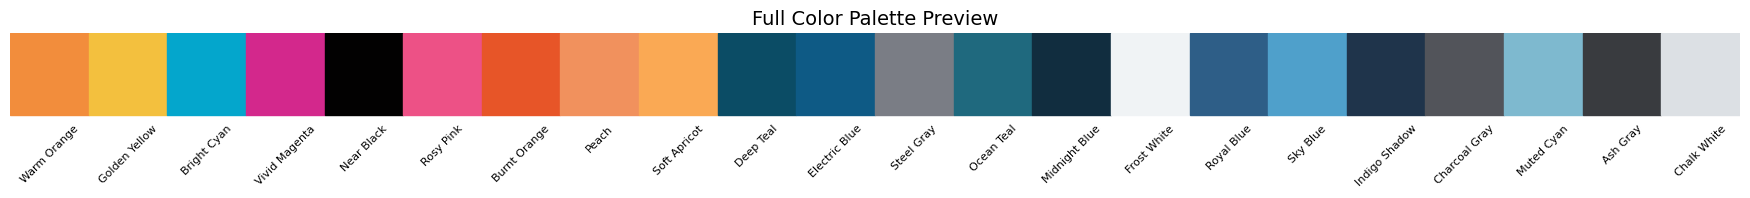

In [10]:
import graph_scores as gs
importlib.reload(gs)
gs.show_color()

## Total Score Graphs

Bluecoat season score progression since 2013

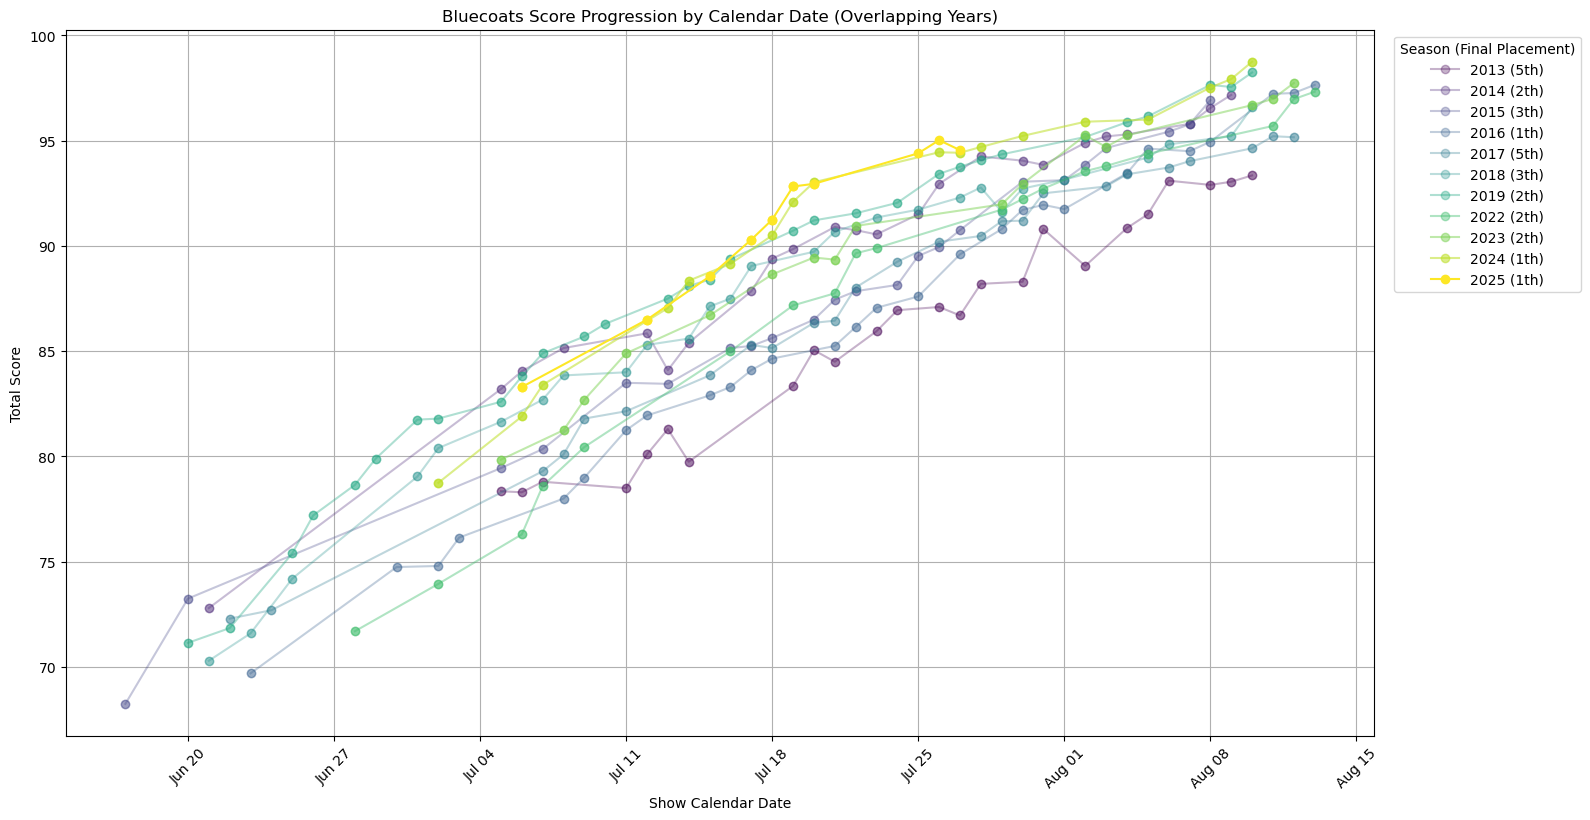

In [12]:
import graph_scores as gs
importlib.reload(gs)
gs.bluecoats_season_trend()

Bluecoats seasons since 2019 highlighting score drops 

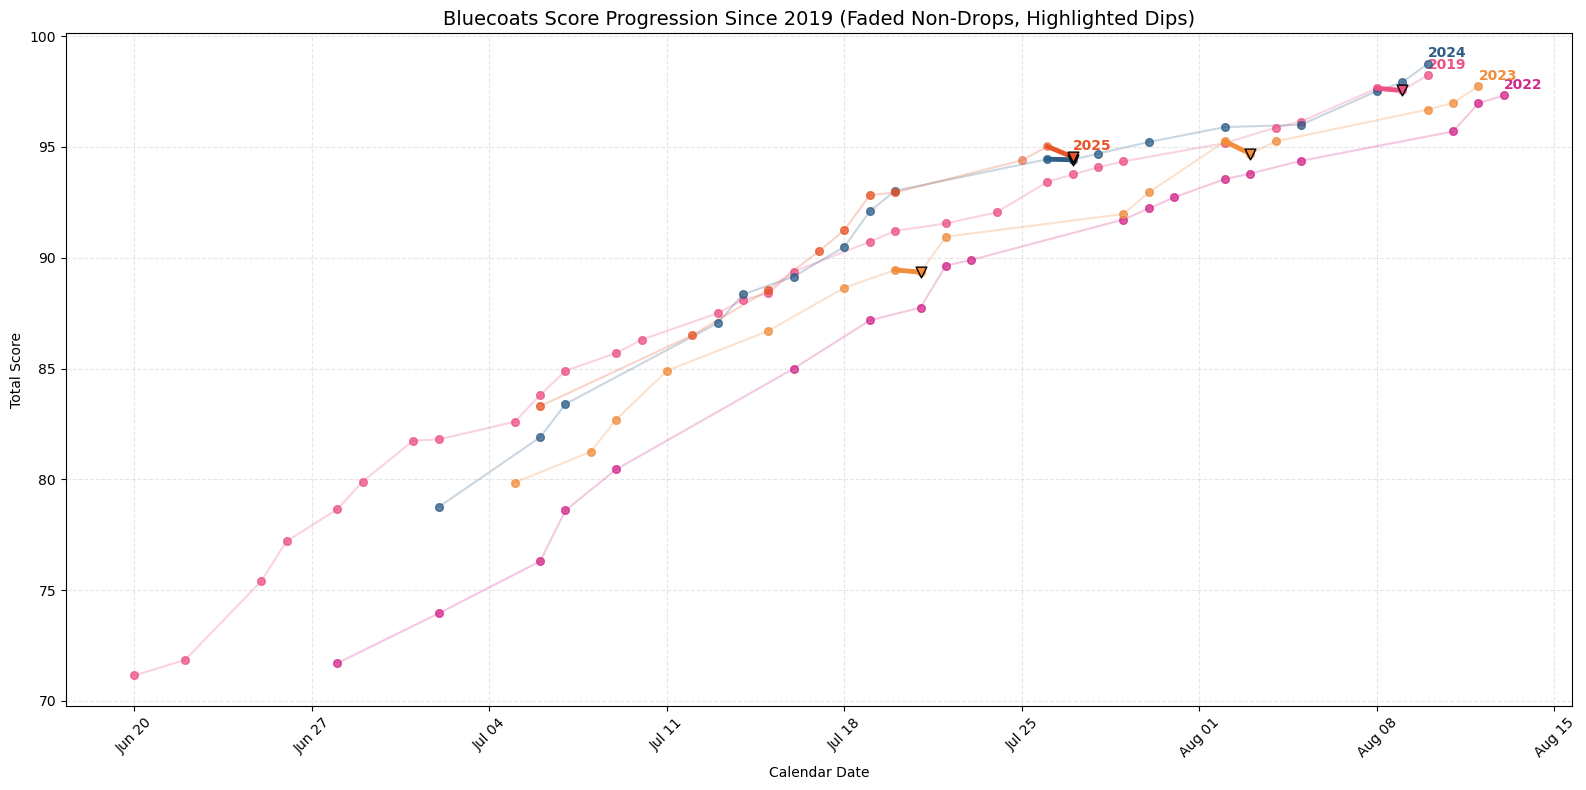

In [13]:
import graph_scores as gs
importlib.reload(gs)
gs.bluecoats_season_trend_highlight_drops()

Bluecoats seasons since 2019 highlighting score increase by at least 1.5

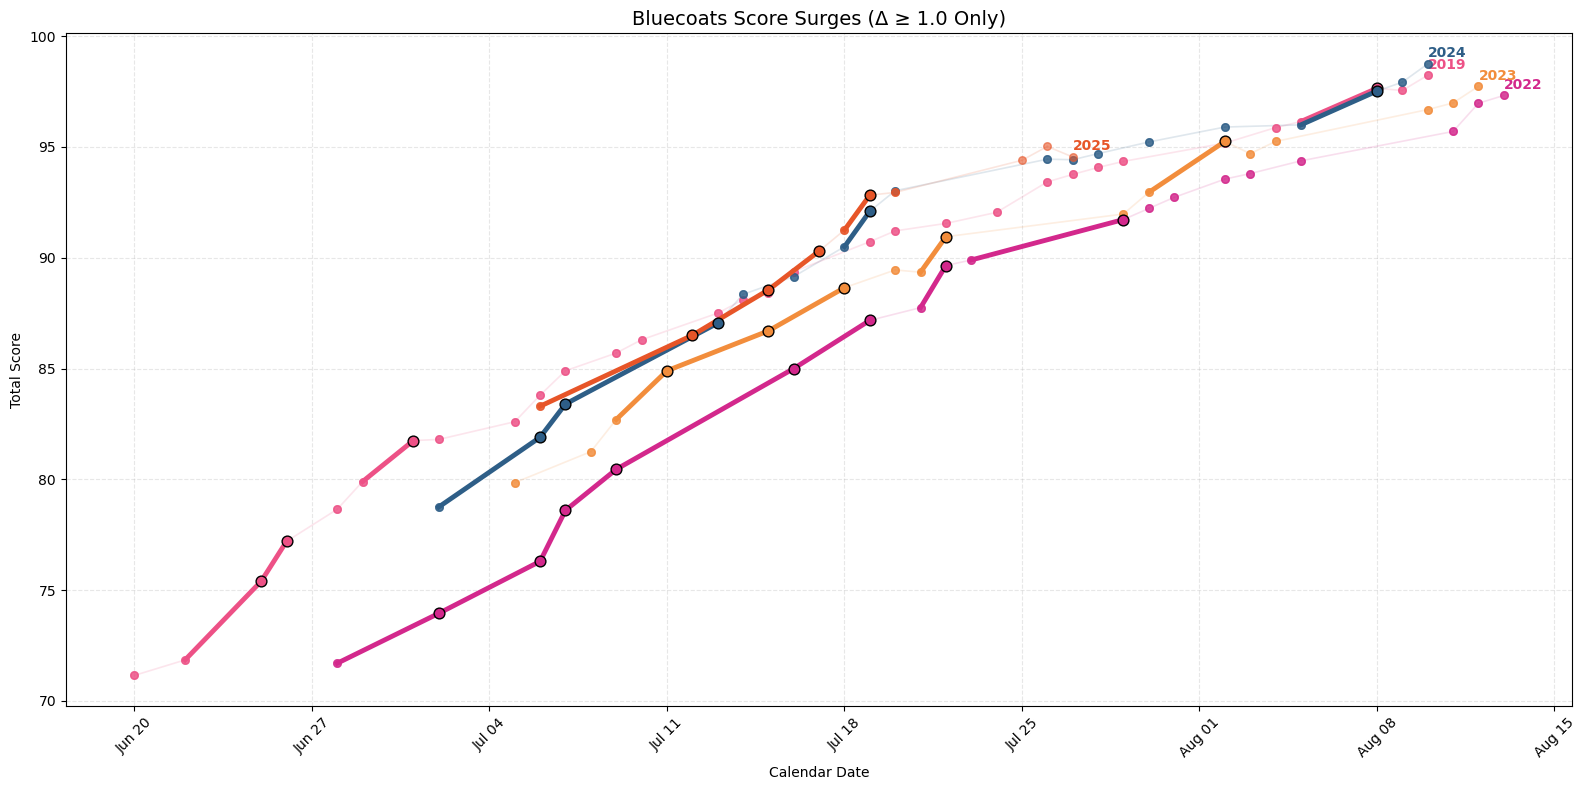

In [14]:
import graph_scores as gs
importlib.reload(gs)
gs.bluecoats_season_trend_highlight_improvements()

Bluecoats season 2025 and past championship seasons. 

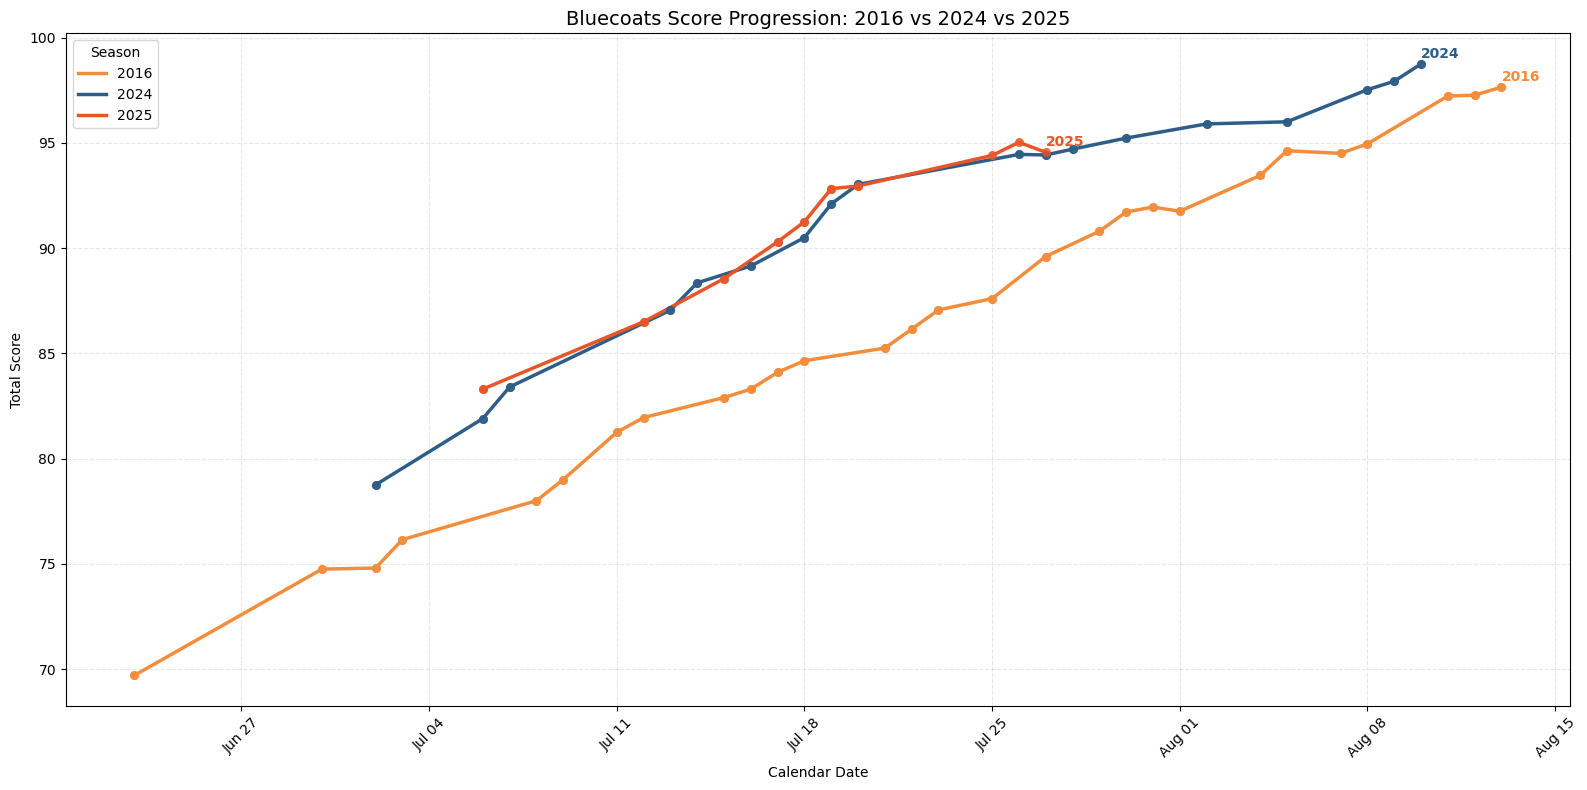

In [15]:
import graph_scores as gs
importlib.reload(gs)
gs.bluecoats_champ_seasons_plot()

## Caption Score Graphs

Bluecoats caption score trend with year 2025, 2024, 2016, and average of 2019-2024

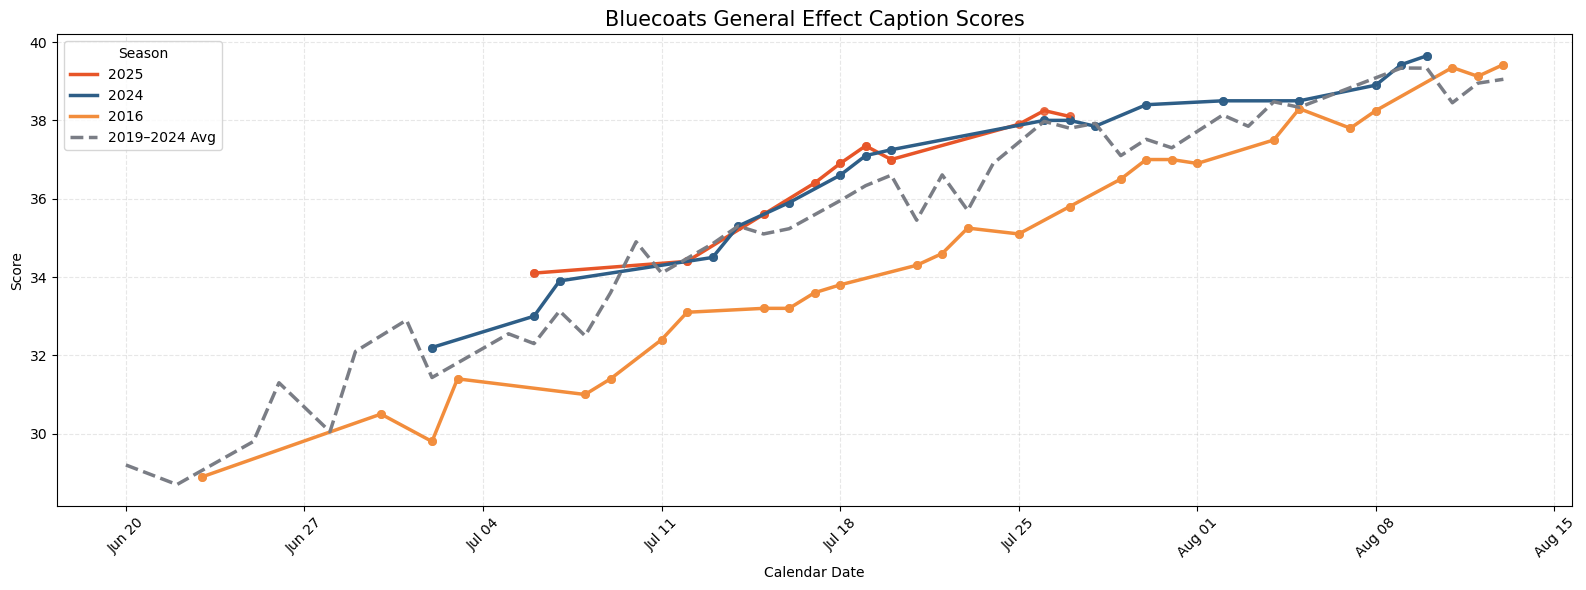

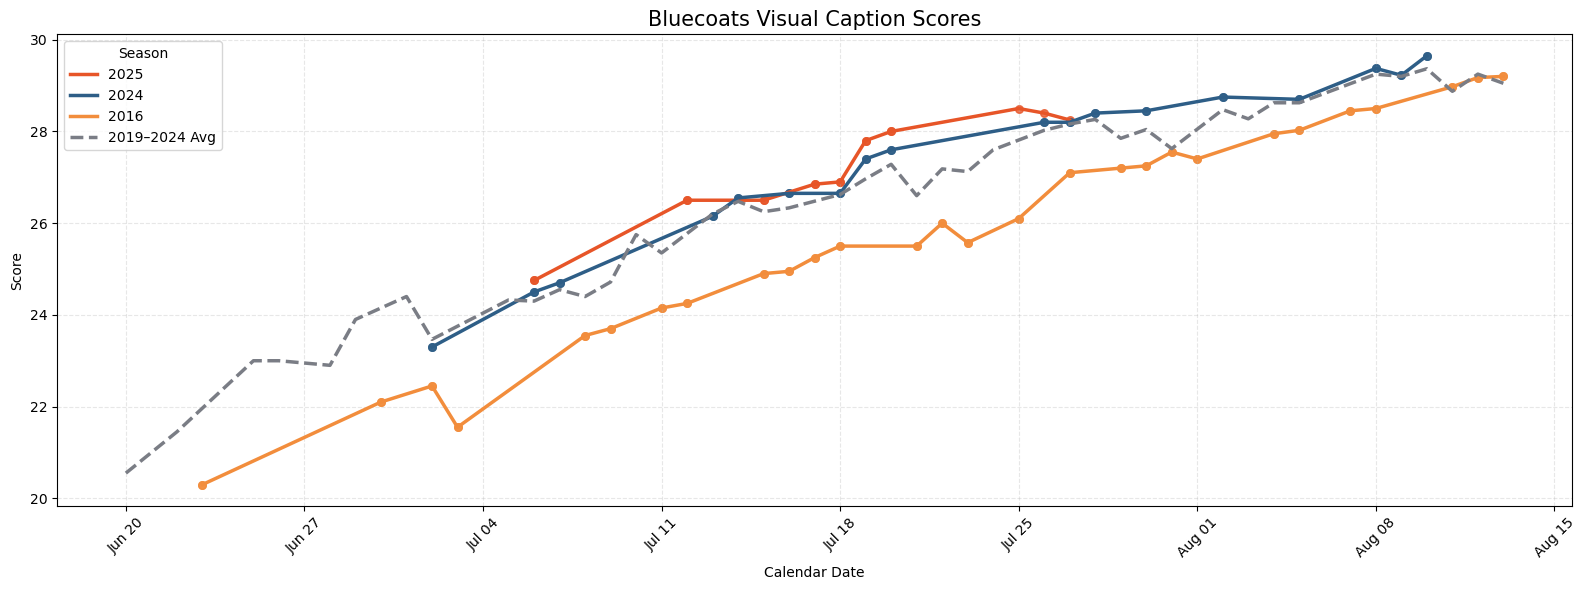

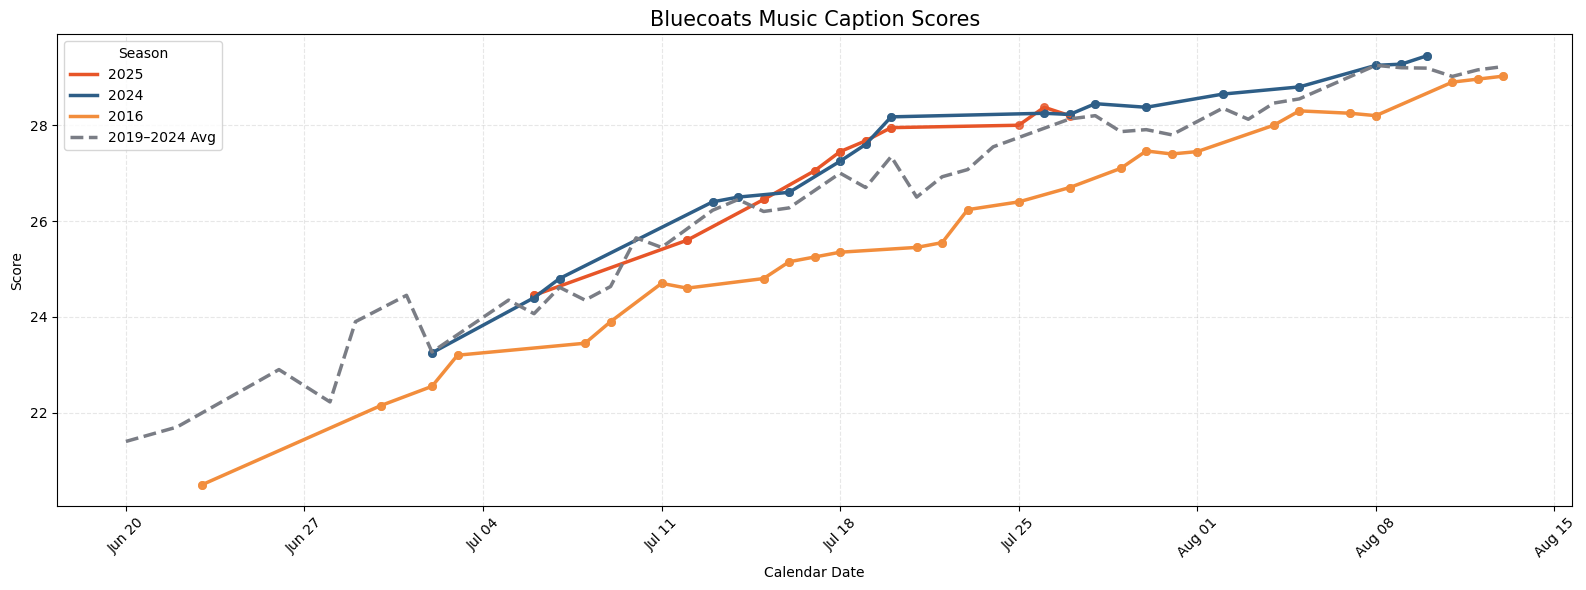

In [16]:
import graph_scores as gs
importlib.reload(gs)
gs.bluecoats_caption_score_trend()

**Future Outlooks & Expansion Ideas**

- Analyze judging trends by **matching judge names to caption scores**, identifying potential judge-specific scoring patterns or biases.
- Determine Bluecoats' **caption rankings in finals** across multiple years to reveal recurring **strengths and weaknesses**.
- If data permits, visualize operational season metrics such as:
  - **Spring training workload**: total and average rehearsal hours per day.
  - **Tour logistics**: total/average miles traveled, bus time, and housing/floor time.
  - **Tour rehearsal intensity**: rehearsal hours per day while on tour.
- Compare **caption score trajectories** of Bluecoats with peer corps (e.g., BD, Crown) for performance trend benchmarking.
- Analyze **score volatility** over a season to identify stability vs. inconsistency.
- Examine the **relationship between performance order and score**, especially at regionals and finals.
- Track **individual caption improvements** post-major show rewrites (if timestamped notes are available).

